# **Capítulo 8: Visión por computador**

## Segmentación de animales en imágenes

Descargamos los datos del caso práctico

In [7]:
!wget -q http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget -q http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

Función de carga y preprocesado de datos

In [8]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Cargamos las imágenes y las máscaras en vectores de NumPy
def cargar_datos(imgs_dir, mascs_dir, tam_img):
    X = []
    Y = []
    for inom in sorted(os.listdir(imgs_dir)):
        if inom.endswith('.jpg') and not inom.startswith('.'):
            # Imagen
            img = img_to_array(load_img(os.path.join(imgs_dir, inom),\
                                        target_size=tam_img))
            # Máscara
            mnom = inom.replace('.jpg', '.png')
            masc = img_to_array(load_img(os.path.join(mascs_dir, mnom),\
                                         color_mode='grayscale',\
                                         target_size=tam_img))
            # Restamos 1 a todos los valores de la máscara
            masc -= 1
            
            X.append(img)
            Y.append(masc)

    X = np.array(X) / 255.0 # Normalizamos
    Y = np.array(Y, dtype='uint8') # Convertimos a enteros
    return X, Y

Carga de datos y creación de particiones de datos

In [9]:
from sklearn.model_selection import train_test_split

# Rutas a los directorios de imágenes y máscaras
imgs_dir = 'images'
mascs_dir = 'annotations/trimaps/'

# Tamaño de las imágenes y máscaras
tam_img = (160, 160)

# Cargamos los datos
X, Y = cargar_datos(imgs_dir, mascs_dir, tam_img)
print('¡Imágenes cargadas!')

# Dividimos el conjunto de datos en entrenamiento y test (80-20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,\
                                                    test_size=0.2,\
                                                    random_state=42)
print('¡Particiones realizadas!')

¡Imágenes cargadas!
¡Particiones realizadas!


Visualización del aspecto de los datos

Tamaño del conjunto de entrenamiento: 5912
Tamaño del conjunto de test: 1478
Tamaño de las imágenes: (160, 160, 3)
Tamaño de las máscaras: (160, 160, 1)


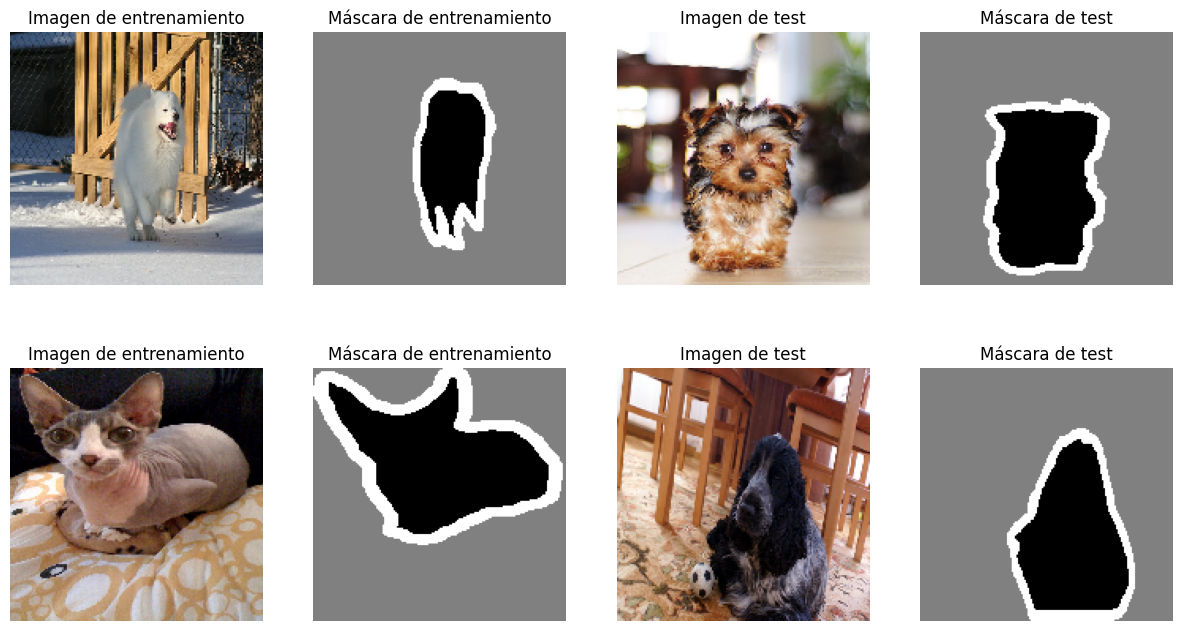

In [10]:
import matplotlib.pyplot as plt

# Dimensiones de los conjuntos de datos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
print(f'Tamaño del conjunto de test: {X_test.shape[0]}')
print(f'Tamaño de las imágenes: {X_train.shape[1:]}')
print(f'Tamaño de las máscaras: {Y_train.shape[1:]}')

# Visualizamos las imágenes y las máscaras
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for i in range(2):
    ax[i, 0].set_title('Imagen de entrenamiento')
    ax[i, 0].imshow(X_train[i])
    ax[i, 1].set_title('Máscara de entrenamiento')
    ax[i, 1].imshow(Y_train[i], cmap='gray')
    ax[i, 2].set_title('Imagen de test')
    ax[i, 2].imshow(X_test[i])
    ax[i, 3].set_title('Máscara de test')
    ax[i, 3].imshow(Y_test[i], cmap='gray')
    # Hacemos los ejes invisibles
    for j in range(4):
        ax[i, j].set_axis_off()
plt.show()
